---
title: 'Linear Regression in Python'
bibliography: /Users/henrikeckermann/Documents/workspace/BibTex/statistic.bib
csl: https://raw.githubusercontent.com/citation-style-language/styles/master/apa.csl
---

## Introduction
Linear regression is a method that provides the average outcome value, given a single or several predictors. We will see throughout this article what exactly that means. I read some introductory books or articles about linear regression analysis before I wrote this up. I want to note that this is not a complete article. Instead I made some notes of the points that were either most important or new for me when reading the book chapter about linear regression of @Gelman2007. The focus lies on the application and interpretation of multiple linear regression. To also practice fitting a linear models in Python, I will present the example @Gelman2007 uses and solve 1 or 2 exercises out of the book in the end. So let's start by remembering the basic model of linear regression:

$$\hat{y} = \beta_0 + \beta_1X_1 + \epsilon$$  
where $\epsilon$ are independent and ~$N(0,\sigma^2)$  

## Notes from the book important to me
#### 1. Single categorical predictor
If we have a single categorical predictor, then $\beta_0$ reflects the mean of one group ($\beta_1 = 0$) and the coefficient $\beta_1$ is the difference in the average between the two groups. Example:  



In [1]:
#Import modules
import pandas as pd
import numpy as np
import os
import statsmodels.api as sm
from plotnine import *
#Import data
os.chdir('/Users/henrikeckermann/Documents/workspace/website/mysite/main/templates/stats/linear_regression/arm_linear_r/child.iq')
df = pd.read_csv('child_python.csv')
df = df.iloc[:,1:6]
df.mom_hs = pd.Categorical(df.mom_hs)
df.head()
#Fit regression model
kid_simple = sm.formula.ols('kid_score ~ mom_hs', data=df).fit()
#Inspect results
kid_simple.summary()

/Users/henrikeckermann/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              kid_score   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.054
Method:                 Least Squares   F-statistic:                     25.69
Date:                Sun, 31 Dec 2017   Prob (F-statistic):           5.96e-07
Time:                        12:46:44   Log-Likelihood:                -1911.8
No. Observations:                 434   AIC:                             3828.
Df Residuals:                     432   BIC:                             3836.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      77.5484      2.059     37.670      0.000      73.502      81.595
mom_hs[T.1]    11.7713      2.322      5.069      0.000       7.207      16.336
==============================================================================
Omnibus:                       11.077   Durbin-Watson:                   1.464
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               11.316
Skew:                          -0.373   Prob(JB):                      0.00349
Kurtosis:                       2.738   Cond. No.                         4.11
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""


So, the equation here is:  
$$kid.score = 77.5 + 11.77*mom.hs + \epsilon$$  

As you can see, the intercept and the coefficient reflect the means of the two groups:  



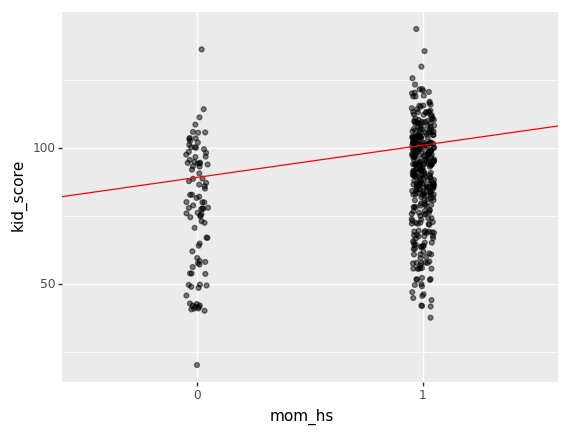

<ggplot: (-9223372036574433841)>

In [2]:
df.loc[df.mom_hs==0,'kid_score'].mean()
df.loc[df.mom_hs==1,'kid_score'].mean()
(ggplot(df, aes(x='mom_hs',y='kid_score'))
 + geom_jitter(width=0.05, alpha=0.5)
 + geom_abline(intercept=77.5, slope=11.8, color='red'))



Let us now consider two different models. First a model where the IQ of the mother predicts the score of the child. Then IQ is added to the previous model:



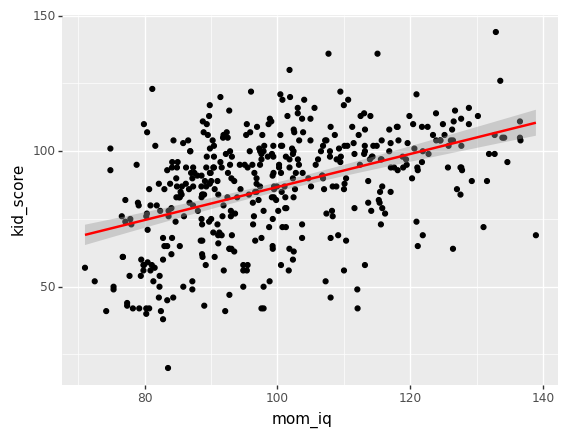

<ggplot: (-9223372036574433953)>

In [3]:
#Fit models
kid_cont = sm.formula.ols('kid_score ~ mom_iq', data=df).fit()
kid_mix = sm.formula.ols('kid_score ~ mom_hs + mom_iq', data=df).fit()
#show results
kid_cont.summary()
(ggplot(df, aes(x='mom_iq', y='kid_score'))
 + geom_point() 
 + geom_smooth(method='lm', color='red'))


$$kid.score = 25.80 + 0.61*mom.iq + \epsilon$$

This model could be interpreted as follows:  
When the mother has an IQ of zero, the kid score would be 25.8 and with a 1 (or 10) unit increase in IQ, the kidscore would increase by 0.6 (or 6). Of course it makes no sense to interpret the intercept here since an IQ cannot be zero.



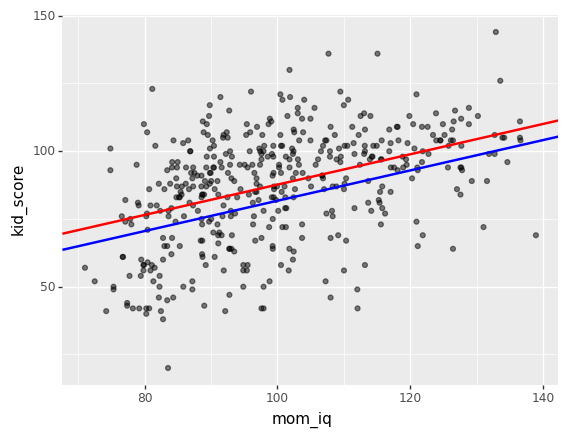

<ggplot: (7538351880)>

In [4]:
kid_mix.summary()

(ggplot(df, aes(x='mom_iq', y='kid_score'))
+ geom_point(alpha= 0.5)
+ geom_abline(intercept= 25.73, slope=0.56, color='blue', size=1)
+ geom_abline(intercept= 31.68, slope=0.56, color='red', size=1))


$$kid.score = 25.73 + 5.95*mom.hs + 0.56mom.iq \epsilon$$

This model could be interpreted as follows:  
If the IQ was 0 and the mom had no highschool education, then the score of the kid would be predicted as 25.8. So, again, we cannot interpret the intercept here. The slopes are equal independent of mom_hs &rarr; the binary variable only adds a constant that reflects the predicted difference in kidscore, given the mothers had the same IQ. Thus, holding the IQ constant, children score 5.95 higher if the mother has highschool completed. And: For children who come from the same group (mom_hs), the model predicts a 0.56 increase in kidscore for each unit increase in mom.iq.


#### 2. Holding constant of other predictors
Interpreting the individual coefficients while holding the others constant is sometimes impossible. E.g. in a model with interactions or when we have a model with $IQ$ and $IQ^2$.  

Back to the example: Let us now include the interaction between the two variables:  



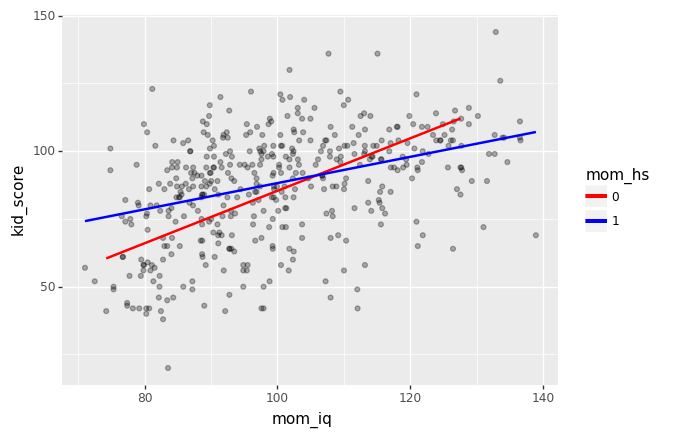

<ggplot: (-9223372029316007564)>

In [5]:
kid_int = sm.formula.ols('kid_score ~ mom_hs*mom_iq', data=df).fit()
kid_int.summary()
(ggplot(df, aes(x='mom_iq', y='kid_score', color='mom_hs'))
 + geom_point(color='black',alpha=0.3)
 + geom_smooth(method='lm', se=False)
 + scale_color_manual(['red','blue']))


$$kid.score = -11.48 + 51.27mom.hs + 0.97mom.iq - 0.48mom.hs*mom.iq$$

The intercept is again meaningless as it reflects the predicted score for mothers with zero IQ and without highschool completion.  Also meaningless: Mom_hs reflects the difference in the score of kids from mothers with zero IQ but who differ in highschool completion. Mom_iq shows the difference in kidscore per unit increase of IQ if mothers did not complete highschool. Finally, the interaction shows the difference in the slopes of IQ between mothers with/without highschool completion: A one unit increase in IQ means an increase of 0.49 in kidscore if mothers who completed highschool or 0.97 if mothers did not complete highschool.


#### 3. Consider interactions whenever main effects are large 
@Gelman2007 advice to consider interactions whenever inputs have large main effects since these also tend to have large interactions with other inputs. This does not mean that small main effects exclude large interaction.

#### 4. ML == OLS if...
The estimates of the $\beta$ coefficients are the same no matter if we use maximum likelihood method or ordinary least square if $\epsilon$ are independent and ~$N(0,\sigma^2)$.

#### 5. Covariance matrix



In [6]:
kid_int.cov_params()

,Intercept,mom_hs[T.1],mom_iq,mom_hs[T.1]:mom_iq
Intercept,189.281841,-189.281841,-2.022099,2.022099
mom_hs[T.1],-189.281841,235.241376,2.022099,-2.462482
mom_iq,-2.022099,2.022099,0.022006,-0.022006
mom_hs[T.1]:mom_iq,2.022099,-2.462482,-0.022006,0.026314


The covariance matrix contains the estimation variances for the coefficients, thus the squareroot of ($\beta_{11}, \beta_{22},\beta_{33}...$) are the standarderrors (SE) of the coefficients. The off-diagonal values represent covariances of estimation. That being said, we do not look at this matrix often but rather selectively consider the SE.

#### 6. $R^2$ and the variance of the Residuals
$R^2$ is the variance explained by the model. The residual sum of squares (RSS) reflects the unexplained variance. If we denote the variance of the data as $s_y^2$, then: $R^2=1-RSS/s_y^2$.  



#### 7. Assumptions
Although we can test for several model assumptions directly from the data, others depend on the knowledge of subject of the researcher. Here is a list of assumptions emphasized by @Gelman2007 in descending order of importance:  

7.1 Validity  
The outcome measure should reflect what we want to measure and the model should include all the relevant predictors. It should also generalize to the cases, where model will be applied to. E.g. training load to predict optimal performance in professional soccer athletes is likely not applicable to to the amateur player who has other work load outside of soccer and less support for recovery etc..      
7.2 Additivity and linearity  
The outcome must have a linear relationship with the predictors. In case violated, tranformations (log, 1/x etc.) might be helpful.  
7.3 Independence of errors
The errors need to be independent. This will be discussed in a later chapter in detail. @Field2012 gives an example: Imagine the distance how far subjects live away from a toxic substance that influences the measured variables differs between subjects. In that cases the error depends on that distance. The Durbin-Watson statistic is a measure of independence of the error and should lie between 1-3, optimally at 2. For time-series data (or with the distance example): Plot errors as a function of time (distance) and look for patterns (e.g. difference in variance across x-axis or curve pattern of the residuals). Generally, indepence of error is achieved by a solid experimental design.  
7.4 Equal variance of errors   
As already mentioned above, the assumption of the linear regression model is: $\epsilon$ ~ $N(0,\sigma^2)$. The variance of the residuals should be constant (homoscedasticity).
7.5 Normality of errors     
This is a point, where the book of @Gelman2007 stands out to other books about the topic. Normality of residuals is considered barely important when estimation of the line is the purpose (as compared to predction of individual data points).

Plotting residuals versus fitted values or individual predictors is advised, which will be illustrated later! @Gelman2007 did not go into detail about outliers or influence in this chapter of the book. To give a more complete picture of linear regression I include notes I made earlier about outliers and influence of the book of @Field2012:

**Outliers:**  
An observation that is unconditionally unusual in either its Y or X value is called a univariate outlier, but it is not necessarily a regression outlier. A regression outlier is an observation that has an unusual value of the dependent variable Y, conditional on X (_Discrepancy_). In other words, for a regression outlier, neither the value of a single predictor nor the Y value is necessarily unusual on its own but it will has a large residual (a typical cutoff point an absolute value of a standardized residual that is > 3). 

**Leverage and Influence:**  
* $_Influence_ = Leverage * Discrepancy$  
* *Cook's Distance* is a measure of how much the model changes if a certain value is removed. This helps to identify values that have a high influence on the model  
- No more than 5% (1%) of the absolute values of the standardized residuals should be > 2(2.5)


#### 8. Predictions
The standard deviation of the errors of our estimations (RSE) is slightly higher than the standard deviation of the distribution of our residuals $\sigma$ because our model is only an estimation of the true regression line. When we predict values, then the deviation from the true line should lie roughly 68% within $|\sigma|$. 

#### 9. Linear transformations
Linear tranformations do not affect the fit or the predictions in linear regression (though they can do so in  multilevel models). But they can improve interpretability of the model. E.g. it can make sense to change income by dividing it by 10.000 or age by dividing it by 10. Standardizing  the variable allows interpreting the intercept as the mean outcome when all predictors are at their mean. @Gelman2007 advices to divide by 2SD under certain circumstances because then the coefficients can better be compared with those for binary inputs. Centering the variable makes the interpretation easier when we include interactions in our model: Each main effect corresponds to the difference in the outcome when the other inputs are at their average. In a model with one continuous predictor, standardizing both outcome and the predictor makes the slope the correlation between the two variables. Generally with two continuous predictors $b= r*\fract{\sigma_y}{\sigma_x}$. In consequence, when the slope is > 1, then this means that the variance of y is greater than the variance of x.


#### Other Transformations 
@Gelman2007 discusses log transformation with the main purposes of improving either model fit or interpretability or both. I advice to read the chapter in the book if this is of interest. One example given was a model that predicts earnings from height. One would expect that the differences in people who earn nothing and 10k to be far greater than the difference between people who earn 80k or 90k. Since the linear model does not reflect this, it makes sense to compress the data. Log-transformation leads to similar differences between 40k and 80k compared to 5k and 10k. A milder compression method is the sqareroot tranformation but it has disadvantages regarding interpretation. Therefore, it might be more suited when prediction is the main goal.


#### General principles for model building (goal: prediction)
What I like so much about the book is that it gives practical guidelinces and the authors share their practical experiences, which is very uselful if you only start working with linear models. The guidelines they give can be summarized as follows:  
- One should include all the predictors that are expected to be important for the outcome
- Sometimes this means combining predictors to one predictor (e.g. averaging)
- As already noted above: Try out including interactions of predictors with large main effects
- To decide whether to include or exclude a predictor, look not only at significance but also at whether the predictor makes sense. If it is not significant but has the expected sign it is generally fine to keep it in the model. If it has an unexpected sign, then you should remove it. If it is significant and has an unexpected sign, think about possible explanations why it could make sense and try to find lurking variables that could explain relationship. Significant coefficients that have the expected signs of course should be kept in the model always.


## Exercises
1. Simulation of independent variables  
> In this exercise you will simulate two variables that are statistically independent of each other to see what happens when we run a regression of one on the other.

> a) First generate 1000 data points from a normal distribution with mean 0 and standard deviation 1. Generate another variable in the same way. Run a regression of one variable on the other. Is the slope coefficient statistically significant? Now run a simulation repeating this process 100 times. This can be done using a loop. From each simulation, save the z-score (the estimated coefficient of var1 divided by its standard error). If the absolute value of the z-score exceeds 2, the estimate is statistically significant._ 



In [7]:
#I run simluate this 10000x right away
pvalues = []
for i in range(1000):
  d = {}
  d['x'] = np.random.normal(0,1, 1000)
  d['y'] = np.random.normal(0,1,1000)
  data = pd.DataFrame(d)
  lin_reg = sm.formula.ols('y ~ x', data=data).fit()
  pvalues.append(lin_reg.pvalues[1])
#As we can see ~ 5% of the coefficients will be statistically significant
(np.array(pvalues) <= 0.05).mean()

0.042999999999999997


_2. Beauty and students evaluation
The folder beauty contains data from Hamermesh and Parker (2005) on student evaluations of instructors’ beauty and teaching quality for several courses at the University of Texas. The teaching evaluations were conducted at the end of the semester, and the beauty judgments were made later, by six students who had not attended the classes and were not aware of the course evaluations._

_a) Run a regression using beauty (the variable btystdave) to predict course evaluations (courseevaluation), controlling for various other inputs. Display the fitted model graphically, and explaining the meaning of each of the coefficients, along with the residual standard deviation. Plot the residuals versus fitted values._

_b) Fit some other models, including beauty and also other input variables. Consider at least one model with interactions. For each model, state what the predictors are, and what the inputs are (see Section 2.1), and explain the meaning of each of its coefficients._

_c) Fit regression models predicting evaluations given many of the inputs in the dataset. Consider interac- tions, combinations of predictors, and transformations, as appropriate. Consider several models, discuss in detail the final model that you choose, and also explain why you chose it rather than the others you had considered._

Unfortunately, I do not know the meaning of many variables in the dataset. For the purpose of exercising, I think it is fine if I pick the ones where I know what was measured. I restrict my analysis to the following variables:

* tenured
* age 
* beauty 
* courseevaluation
* female
* blkandwhite





/Users/henrikeckermann/anaconda3/lib/python3.6/site-packages/plotnine/stats/smoothers.py:150: UserWarning: Confidence intervals are not yet implementedfor lowess smoothings.
  warnings.warn("Confidence intervals are not yet implemented"


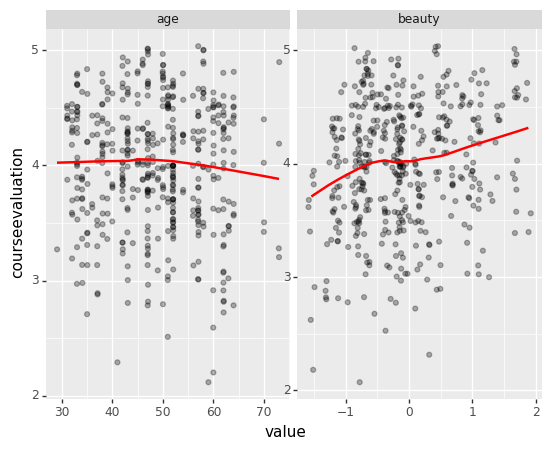

<ggplot: (7539435503)>

In [8]:
#import modules
from plotnine import *
import numpy as np
import pandas as pd 
import statsmodels.api as sm
#import data
bdf = pd.read_csv('http://www.stat.columbia.edu/~gelman/arm/examples/beauty/ProfEvaltnsBeautyPublic.csv')
#rename btystdave to beauty for convenience
bdf.columns = ['beauty' if x=='btystdave' else x for x in bdf.columns]
#contert to categorical vars 
for col in ['female', 'tenured' ,'blkandwhite', 'nonenglish']:
  bdf[col] = pd.Categorical(bdf[col]) 
#long format categoricals for plotting
bdf_cat_l = pd.melt(bdf[['tenured', 'courseevaluation', 'female', 'blkandwhite', 'nonenglish']], id_vars = 'courseevaluation')
#courseevaluation between categoricals
(ggplot(bdf_cat_l, aes(x='value', y='courseevaluation')) 
+ geom_jitter(alpha=0.2, width=0.2)
+ stat_summary(fun_data = 'mean_sdl', fun_args = {'mult':1}, geom = 'errorbar', color = 'darkblue')
+ stat_summary(fun_y = np.mean, geom = 'point', fill = 'red')
+ facet_wrap('~variable'))
#Relationship between continuous measures and courseevaluation
conts = ['age', 'courseevaluation', 'beauty']
#long format continuous
bdf_cont_l = pd.melt(bdf[conts], id_vars = 'courseevaluation')
#Plot continuous pred vs outcome
(ggplot(bdf_cont_l, aes(x='value', y='courseevaluation'))
+ geom_jitter(alpha=0.3, width=0.05)
+ geom_smooth(color='red') 
+ facet_wrap('~variable', scales='free'))

The plots show that males have higher mean sores than females and nonenglish speaking lecturers have lower mean scores. There is also a difference between black and white in the mean score. Beauty is positively associated with evaluation. I fitted some models with single predictors to get a feeling for the individual predictors but you will see only a model with all predictors but age. I removed age because it was not significant and the plot does not suggest any pattern (maybe a main effect for the oldest age group)



In [9]:
#Fit model
blr_5 = sm.formula.ols('courseevaluation ~ beauty + female + nonenglish + blkandwhite +tenured', data=bdf).fit()
blr_5.summary()

#I would like to get an impression how the individual predictors compare in their contribution so I try out Gelmans advice of scaling by 2SD
bdf['zz_beauty'] = (bdf.beauty - bdf.beauty.mean())/2*bdf.beauty.std()

blr_6 = sm.formula.ols('courseevaluation ~ zz_beauty + female + nonenglish + blkandwhite +tenured', data=bdf).fit()
blr_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       courseevaluation   R-squared:                       0.124
Model:                            OLS   Adj. R-squared:                  0.114
Method:                 Least Squares   F-statistic:                     12.90
Date:                Sun, 31 Dec 2017   Prob (F-statistic):           9.43e-12
Time:                        12:46:53   Log-Likelihood:                -353.18
No. Observations:                 463   AIC:                             718.4
Df Residuals:                     457   BIC:                             743.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            4.1500      0.047     87.761      0.000       4.057       4.243
female[T.1]         -0.2510      0.052     -4.852      0.000      -0.353      -0.149
nonenglish[T.1]     -0.3949      0.103     -3.840      0.000      -0.597      -0.193
blkandwhite[T.1]     0.2716      0.069      3.938      0.000       0.136       0.407
tenured[T.1]        -0.1241      0.052     -2.404      0.017      -0.226      -0.023
zz_beauty            0.2644      0.083      3.185      0.002       0.101       0.427
==============================================================================
Omnibus:                       18.107   Durbin-Watson:                   1.500
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               19.587
Skew:                          -0.503   Prob(JB):                     5.58e-05
Kurtosis:                       2.950   Cond. No.                         5.41
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""


In the last model with the standardized input, the intercept of 4.15 reflects the mean score of courseevaluation for males, english speaking, non-tenured with the mean score of beauty. We can see that non-english speaking lecturers are 0.4 worse when beauty is at average and the other predictors are held constant. I will plot residuals vs. fitted values after I included interactions.






In [10]:
#center beauty 
bdf['c_beauty'] = bdf.beauty-bdf.beauty.mean()
blr_7 = sm.formula.ols('courseevaluation ~ c_beauty + female + nonenglish + blkandwhite +tenured + c_beauty:female', data=bdf).fit()
blr_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       courseevaluation   R-squared:                       0.130
Model:                            OLS   Adj. R-squared:                  0.119
Method:                 Least Squares   F-statistic:                     11.40
Date:                Sun, 31 Dec 2017   Prob (F-statistic):           6.90e-12
Time:                        12:46:53   Log-Likelihood:                -351.40
No. Observations:                 463   AIC:                             716.8
Df Residuals:                     456   BIC:                             745.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                4.1426      0.047     87.550      0.000       4.050       4.236
female[T.1]             -0.2446      0.052     -4.732      0.000      -0.346      -0.143
nonenglish[T.1]         -0.3999      0.103     -3.898      0.000      -0.601      -0.198
blkandwhite[T.1]         0.2809      0.069      4.073      0.000       0.145       0.416
tenured[T.1]            -0.1073      0.052     -2.053      0.041      -0.210      -0.005
c_beauty                 0.1591      0.044      3.634      0.000       0.073       0.245
c_beauty:female[T.1]    -0.1191      0.063     -1.880      0.061      -0.244       0.005
==============================================================================
Omnibus:                       16.102   Durbin-Watson:                   1.491
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.251
Skew:                          -0.471   Prob(JB):                     0.000180
Kurtosis:                       2.916   Cond. No.                         5.40
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""


This yields: $eval = 4.14 - 0.25female -0.40non_e + 0.28blkw - 0.11tenu + 0.16beauty - 0.12beauty:female$   


The intercept reflects evaluation at mean beauty and all binaries at zero. Females with average beauty are evaluated 0.24 lower than males when all other binaries are at zero. Non English speaking teachers with average beauty are evaluated 0.4 lower, again when all other binaries == 0. Interestingly, the interaction term reveals that the association between beauty and evaluation is stronger for males. Let us plot this:



/Users/henrikeckermann/anaconda3/lib/python3.6/site-packages/plotnine/stats/smoothers.py:150: UserWarning: Confidence intervals are not yet implementedfor lowess smoothings.
  warnings.warn("Confidence intervals are not yet implemented"


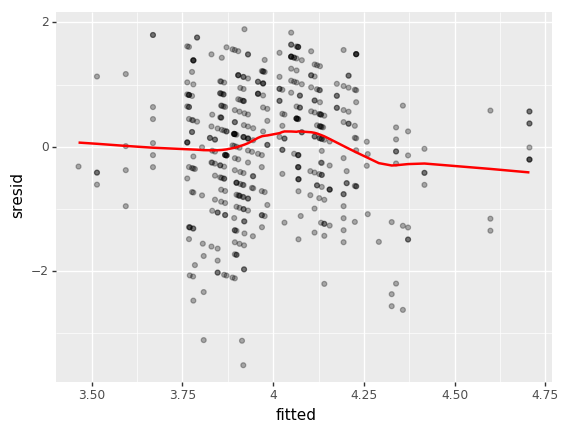

<ggplot: (274840780)>

In [11]:
(ggplot(bdf, aes(x='beauty', y='courseevaluation', color='female'))
+ geom_point(alpha=0.3, color='black')
+ geom_smooth(method='lm', se=False)
+ scale_color_manual(['red','blue']))

#Plot residuals vs fitted values 
bdf['fitted'] = blr_7.fittedvalues
bdf['resid'] = blr_7.resid
bdf['sresid'] = blr_7.resid/blr_7.resid.std()
blr_7.resid.std()



(ggplot(bdf, aes(x='fitted', y= 'sresid'))
+ geom_point(alpha=0.3)
+ geom_smooth(color='red'))